In [34]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    mean_absolute_error,
    mean_squared_error
)
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random as rnd

In [35]:
df=pd.read_csv('.\\ParisHousing.csv')
df['price'].describe()


count    1.000000e+04
mean     4.993448e+06
std      2.877424e+06
min      1.031350e+04
25%      2.516402e+06
50%      5.016180e+06
75%      7.469092e+06
max      1.000677e+07
Name: price, dtype: float64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [37]:
df.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [38]:
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


<Axes: >

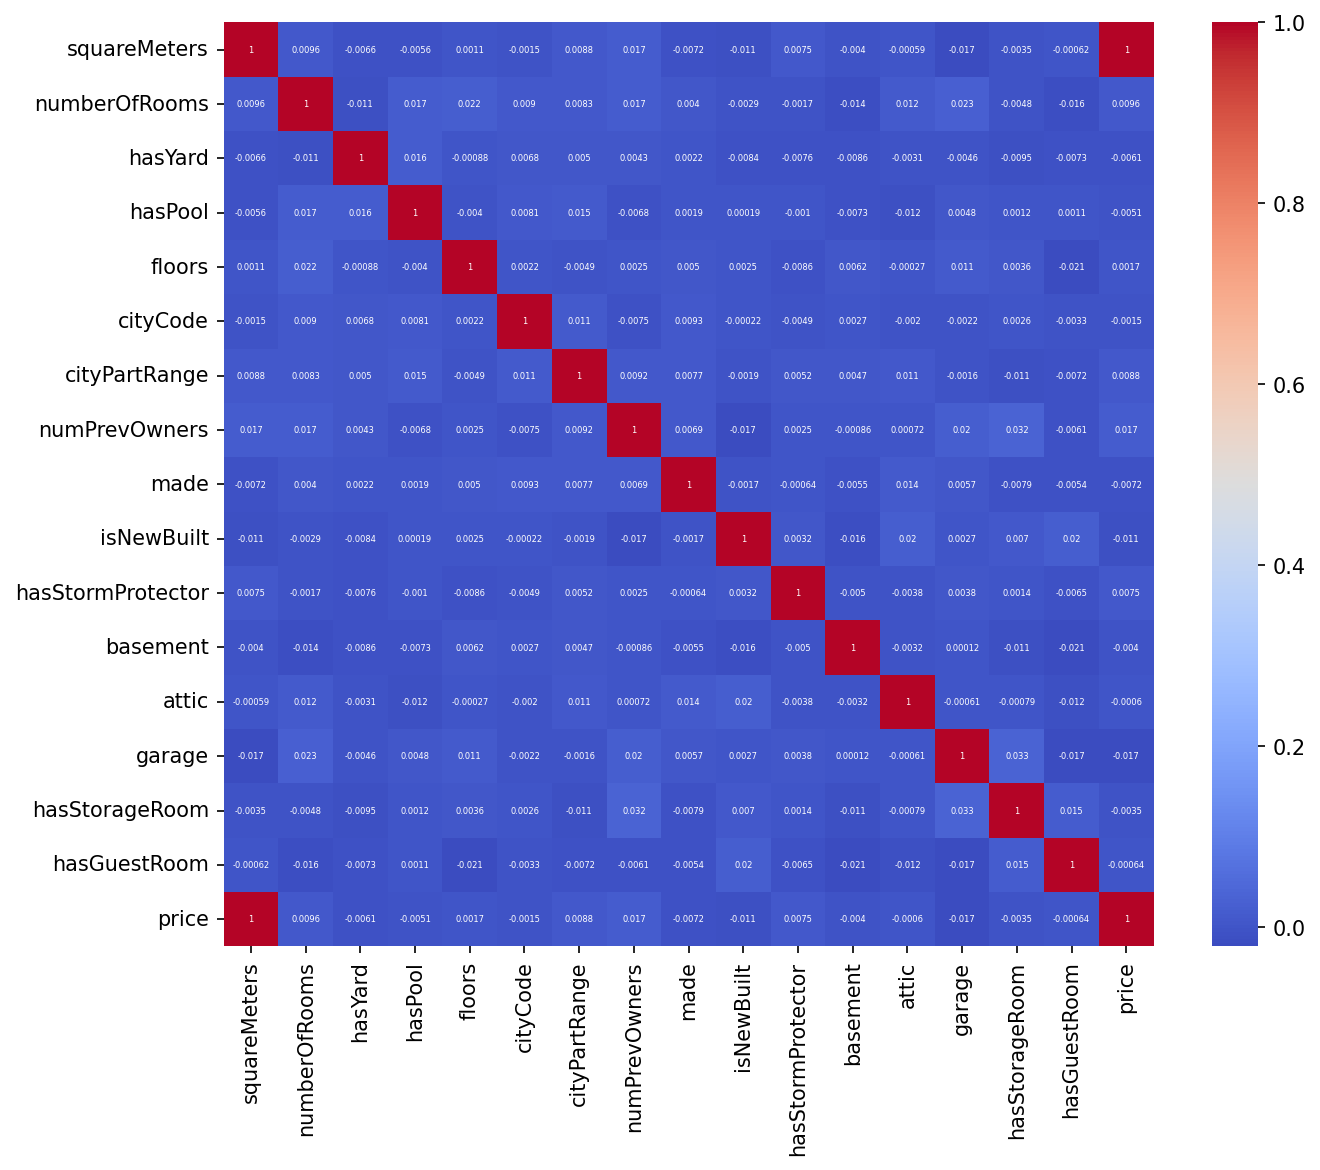

In [39]:
X=df.drop('price',axis=1)
y=df['price'].values.reshape(-1,1)

plt.figure(figsize=(10, 8),dpi=150)


sns.heatmap(df.corr(),annot=True, cmap='coolwarm',annot_kws={'size':4})

In [40]:
scaler=StandardScaler()
X_norm=scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_norm, y, random_state=42, test_size=0.2
)



Epoch 1/200
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 32795678212096.0000 - mae: 4964014.0000
Epoch 2/200
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 32782839447552.0000 - mae: 4963021.0000
Epoch 3/200
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 32742773358592.0000 - mae: 4960029.0000
Epoch 4/200
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 32663438098432.0000 - mae: 4954196.0000
Epoch 5/200
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 32537367805952.0000 - mae: 4945001.0000
Epoch 6/200
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 32361427238912.0000 - mae: 4932249.5000
Epoch 7/200
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 32132963500032.0000 - mae: 4915689.0000
Epoch 8/200
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 31847541112832.0000 - mae: 4895024.5000
Epoch 9/200
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 31502224064512.0000 - mae: 4870015.0000
Epoch 10/200
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 31096225923072.0000 - mae: 48

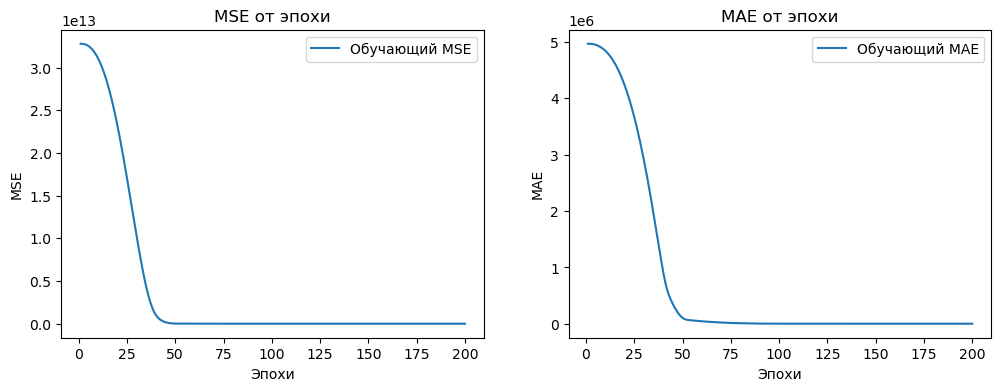

In [63]:

model = Sequential()
model.add(Dense(16, input_shape=(16,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=1)
epochs = range(1, len(history.history['loss']) + 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['loss'], label='Обучающий MSE')
plt.title('MSE от эпохи')
plt.xlabel('Эпохи')
plt.ylabel('MSE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['mae'], label='Обучающий MAE')
plt.title('MAE от эпохи')
plt.xlabel('Эпохи')
plt.ylabel('MAE')
plt.legend()


mse_per_epoch = history.history['loss']
min_mse = min(mse_per_epoch)
min_mse_epoch = mse_per_epoch.index(min_mse) + 1

mae_per_epoch = history.history['mae']
min_mae = min(mae_per_epoch)
min_mae_epoch = mae_per_epoch.index(min_mae) + 1

print(f"Минимальный MSE: {min_mse} Эпоха с минимальным MSE: {min_mse_epoch}")
print(f"Минимальный MAE: {min_mae} Эпоха с минимальным MAE: {min_mae_epoch}")


test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"MSE на тесте: {test_loss:}")
print(f"MAE на тесте: {test_mae:}")

In [42]:
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)
predictions=linear_model.predict(X_test)
mse=mean_squared_error(y_test,predictions)
mae=mean_absolute_error(y_test,predictions)
print(f'MAE: {mae}')
print(f"MSE : {mse}")

MAE: 1510.0341808541818
MSE : 3695708.440618622


**Класс нейросеть**

Класс нейросеть
- функция создания входного слоя
- функция создания скрытого слоя
- функция создания выходного слоя
- функции актвации
- функции активации производные
- функция приложения активации
- функция обучения 
    - прямой проход
    - обратный проход
- функция предикта()
- функция evaluate()

In [52]:
class NeuralNetwork():

    def __init__(self, learning_rate):
        self.weights = []
        self.bias = []
        self.activations = [] 
        self.current_layer_size = None
        self.learning_rate = learning_rate

    def add_input_layer(self, input_size):
        self.input_size = input_size  
        self.current_layer_size = input_size

    def add_hidden_layer(self, hidden_size, activation):
        n = self.current_layer_size  
        m = hidden_size              
        self.current_layer_size = hidden_size
        weights = np.random.randn(m, n) * np.sqrt(2.0 / n)  
        self.weights.append(weights)
        self.bias.append(np.zeros(m))
        self.activations.append(activation)

    def add_output_layer(self, output_size, activation):
        n = self.current_layer_size
        m = output_size
        self.current_layer_size = output_size
        weights = np.random.randn(m, n) * np.sqrt(2.0 / n)
        self.weights.append(weights)
        self.bias.append(np.zeros(m))
        self.activations.append(activation)

    def relu(self, x):
        return np.maximum(0, x)

    def linear(self, x):
        return x

    def leaky_relu(self, x, alpha=0.01):
        return np.maximum(alpha * x, x)
    
    def relu_derivative(self, x):
        return (x > 0).astype(float)

    def linear_derivative(self, x):
        return np.ones(x.shape, dtype=x.dtype)

    def leaky_relu_derivative(self, x, alpha=0.01):
        return np.where(x > 0, 1.0, alpha)
    
    def apply_activation(self, x, activation):
        if activation == 'relu':
            return self.relu(x)
        elif activation == 'linear':
            return self.linear(x)
        elif activation == 'leaky relu':
            return self.leaky_relu(x)
        
    def activation_derivative(self, x, activation):
        if activation == 'relu':
            return self.relu_derivative(x)
        elif activation == 'linear':
            return self.linear_derivative(x)
        elif activation == 'leaky relu':
            return self.leaky_relu_derivative(x)
    


    def direct_passage(self, X):
        current_input = X
        y_reg_lst = []
        activ_lst = []
        for i in range(len(self.weights)):
            w = self.weights[i]
            b = self.bias[i]
            y_reg = current_input @ w.T + b
            y_reg_lst.append(y_reg)
            activ_val = self.apply_activation(y_reg, self.activations[i])
            activ_lst.append(activ_val)
            current_input = activ_val
        return current_input, y_reg_lst, activ_lst

    def reverse_passage(self, y_pred, y_true, y_reg_lst, activ_lst, X):
        num_layers = len(self.weights)
        batch_size = y_true.shape[0]
        

        dL_dy_pred = (2.0 / batch_size) * (y_pred - y_true)
        loss = dL_dy_pred * self.activation_derivative(y_reg_lst[-1], self.activations[-1])

        grad_weights = []
        grad_bias = []

        for i in reversed(range(num_layers)):
            if i == 0:
                activ_reverse = X
            else:
                activ_reverse = activ_lst[i - 1]

            derivative_W = loss.T @ activ_reverse
            derivative_b = np.sum(loss, axis=0)

            grad_weights.append(derivative_W)
            grad_bias.append(derivative_b)

            if i > 0:
                loss = (loss @ self.weights[i]) * self.activation_derivative(y_reg_lst[i - 1], self.activations[i - 1])

        grad_weights = grad_weights[::-1]
        grad_bias = grad_bias[::-1]

        return grad_weights, grad_bias

    def fit(self, X_train, y_train, epochs=10, batch_size=32, verbose=1):

        y_train = np.nan_to_num(y_train)        
        num_train_samples = X_train.shape[0]
        best_loss = 100**100
        best_mae=100**100
        best_epoch = -1  
        learning_lst=[0,1,2,3,4,5,6,7,8,9]
        for epoch in range(epochs):
            epoch_loss_mse = 0.0
            epoch_loss_mae = 0.0
            num_batches = 0
            
            for start in range(0, num_train_samples, batch_size):
                end = min(start + batch_size, num_train_samples)
                X_batch = X_train[start:end]
                y_batch = y_train[start:end]
                
                y_pred, z_list, a_list = self.direct_passage(X_batch)
                grad_weights, grad_bias = self.reverse_passage(y_pred, y_batch, z_list, a_list, X_batch)
                
                
                for i in range(len(self.weights)):
                    self.weights[i] -= self.learning_rate * grad_weights[i]
                    self.bias[i] -= self.learning_rate * grad_bias[i]
                
                
                batch_mse = np.sum((y_pred - y_batch) ** 2)/batch_size
                batch_mae = np.sum(np.abs(y_pred - y_batch))/batch_size
                
                epoch_loss_mse += batch_mse
                epoch_loss_mae += batch_mae
                num_batches += 1
            
            avg_mse = epoch_loss_mse / num_batches
            avg_mae = epoch_loss_mae / num_batches

            if avg_mse < best_loss:
                best_loss = avg_mse
                best_epoch = epoch

            if verbose==1 :
                if epoch % 10 == 0 or epoch in learning_lst:
                    print(f"эпоха {epoch}, MSE: {avg_mse:}, MAE: {avg_mae:}")
        
        self.best_mse = best_loss
        self.best_epoch = best_epoch
        print(f"Лучшие показатели: эпоха: {best_epoch}, MSE: {best_loss} MAE {avg_mae}")

    def predict(self, X):
        y_pred, _, _ = self.direct_passage(X)
        return y_pred

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        mse = np.mean((y_pred - y_test) ** 2)
        mae = np.mean(np.abs(y_pred - y_test))
        return {"mse": mse, "mae": mae}

In [55]:
model=NeuralNetwork(learning_rate=0.00000001)
model.add_input_layer(input_size=16)
model.add_hidden_layer(hidden_size=8, activation='leaky relu')
model.add_output_layer(output_size=1,activation='linear')  

model.fit(X_train, y_train, epochs=2000, batch_size=32, verbose=1)
metrics = model.evaluate(X_test, y_test)
print(f"MSE  {metrics['mse']:}")
print(f"MAE: {metrics['mae']:}")

эпоха 0, MSE: 9128364151610.344, MAE: 1469551.3332397942
эпоха 1, MSE: 3763509.596799132, MAE: 1512.3994270942962
эпоха 2, MSE: 3760860.671208098, MAE: 1512.100766641137
эпоха 3, MSE: 3758323.5746858, MAE: 1511.8012010085238
эпоха 4, MSE: 3755886.4505683603, MAE: 1511.5146903034088
эпоха 5, MSE: 3753576.448119956, MAE: 1511.236029925537
эпоха 6, MSE: 3751390.4714496294, MAE: 1510.9661382187237
эпоха 7, MSE: 3749312.479547916, MAE: 1510.702671601391
эпоха 8, MSE: 3747338.581076598, MAE: 1510.4463857017424
эпоха 9, MSE: 3745574.2840869655, MAE: 1510.1983572656522
эпоха 10, MSE: 3743971.2581322547, MAE: 1509.9805355422322
эпоха 20, MSE: 3731470.3115354646, MAE: 1508.0588647674936
эпоха 30, MSE: 3724096.121059907, MAE: 1506.7648277959145
эпоха 40, MSE: 3719392.516568421, MAE: 1505.8362469088077
эпоха 50, MSE: 3716619.6363919596, MAE: 1505.2268519986333
эпоха 60, MSE: 3714691.838006932, MAE: 1504.7661682850232
эпоха 70, MSE: 3713171.2814862654, MAE: 1504.4062527524968
эпоха 80, MSE: 3711964

# Сравнение моделей предсказания цен на жилье

| Модель | MSE | MAE |
|--------|-----|-----|
| Линейная регрессия (sklearn) | 3,695,708.44 | 1,510.03 |
| Нейросеть (Keras) | 5,220,645.00 | 1,775.96 |
| Ручная реализация | 3,872,335.35 | 1,551.93 |